# Static code analyis with SonarQube

Introduction to getting started and using SonarQube

# Static code analysis
Analysis  of code without executing it. Can detect various issues such as dead code, possible performance, design, naming and other kinds of issues.

```
public void a(int y) {  // method and/or param name?
                        // empty method?
}
```

# Static code analysis
Usually done by analysing source code and constructing AST (Abstract Sytax Tree).
<table>
<tr> <td><pre>
while b ≠ 0
  if a > b
    a := a − b
  else
    b := b − a
return a</pre>
</td><td><img width="400px" height="auto" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Abstract_syntax_tree_for_Euclidean_algorithm.svg/400px-Abstract_syntax_tree_for_Euclidean_algorithm.svg.png" /></td></tr>
</table>


Source: https://en.wikipedia.org/wiki/Abstract_syntax_tree

# SonarQube
[SonarQube](https://www.sonarqube.org) allows tracking project's and different branches quality in terms of:

- Issues found by statically analyzing issues internally and found by external tools
- Coverage by tests
- Code complexity

Supports: Java, C#, Scala, Python and other languages


# Architecture

```
+----------------------------+            +--------------------------------+
|                            |            |                                |
|                            +<-----------+  Sonar scanner                 |
|                            |            |                                |
|                            |            +--------------------------------+
|   Server, i.e.             |
|                            |            +--------------------------------+
|   http://localhost:9000    |            |                                |
|                            +<-----------+  Maven scanner                 |
|                            |            |                                |
|                            |            +--------------------------------+
|                            |
|                            |            +--------------------------------+
|                            |            |                                |
|                            +<-----------+  Other scanners...             |
|                            |            |                                |
+----------------------------+            +--------------------------------+
```

# Getting started: server side

1. Just download zip from https://www.sonarqube.org/downloads/
2. Extract
3. If needed add any additional plugins to *./extensions/downloads* folder
4. Run **./bin/windows-x86-64/StartSonar.bat**
5. Open http://localhost:9000 in your browser

# Getting started: server side
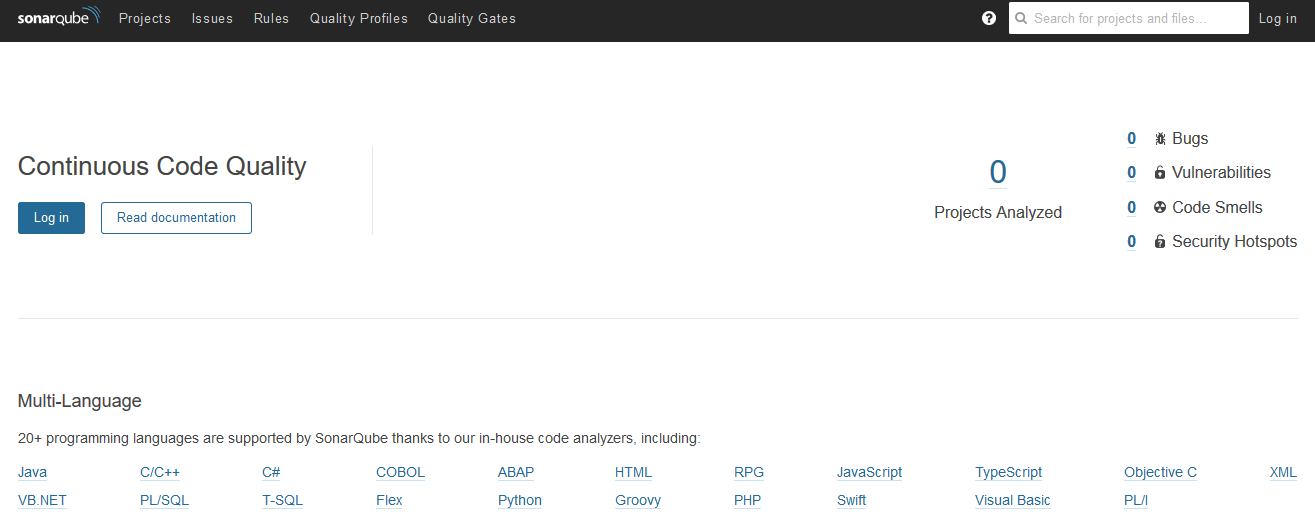

# Getting started: scanning using sonar-scanner

1. Download and extract scanner from https://docs.sonarqube.org/latest/analysis/scan/sonarscanner/
2. git clone https://github.com/algorithm-visualizer/algorithm-visualizer.git
3. cd algorithm-visualizer
3. Run sonar-scanner.cmd, either
    - ```sonar-scanner.cmd -Dsonar.projectKey="test:js" -Dsonar.projectName="Test js project" -Dsonar.sources="."```
    - you can specify everything in *sonar-project.properties* file and run sonar-scanner.cmd from that directory


# Getting started: scanning dotnet

1. git clone https://github.com/dotnet/arcade-minimalci-sample.git
2. dotnet tool install --global dotnet-sonarscanner
3. dotnet-sonarscanner begin /k:"test:dotnet" /v:"1.0.0" /n:"Test C# project" /d:sonar.host.url="http://localhost:9000"
4. dotnet build
5. dotnet-sonarscanner end

# Getting started: scanning java using maven goal

1. git clone https://github.com/jenkins-docs/simple-java-maven-app.git
2. cd simple-java-maven-app
2. mvn clean install sonar:sonar

# Scanner configuration

Some important properties, which can be specified using command line arguments or in properties file:

- *sonar.host.url* property, i.e. -Dsonar.host.url=http://localhost:88888
- *sonar.projectBaseDir* property if you want to run from different directory i.e. -Dsonar.projectBaseDir="/home/ftpdrop/cobol/project1"
- *sonar.projectKey*
- *sonar.projectName*
- *sonar.sources*
- *sonar.externalIssuesReportPaths*
- *sonar.coverageReportPaths*

# Custom analysis using Sonar API
Examples exist for Java, Python, PHP languages:
1. git clone https://github.com/SonarSource/sonar-custom-rules-examples
2. Open java project
3. Create new rule extending BaseTreeVisitor class and implementing JavaFileScanner interface
4. Add rule to the org.sonar.samples.java.RulesList class


# Custom analysis using Sonar API

```
@Rule(key = "AvoidTooManyParams", name = "Too many params", description = "Method contains too many arguments.")
public class AvoidTooManyParamsRule extends BaseTreeVisitor implements JavaFileScanner {
	private JavaFileScannerContext context;
    
	@RuleProperty(defaultValue = "3", description = "Max allowed number of arguments")
	protected int maxParams;
    
	@Override
	public void scanFile(JavaFileScannerContext context) {
		this.context = context;
		scan(context.getTree());
	}
	@Override
	public void visitMethod(MethodTree tree) {
		if (tree.parameters().size() > maxParams) {
			context.reportIssue(this, tree, "Consider using object with required properties");
		}
		super.visitMethod(tree);
	}
}
```

# Custom analysis using Sonar API
1. Run mvn clean install
2. Copy jar to ./extendsions/downloads folder
3. Restart SonarQube
4. Enable custom rules:
    - Create new Quality Profile
    - Enable rules
    - Set as default profile
5. Run analysis on a sample Java project (mvn clean install sonar:sonar)

# Custom analysis using Roslyn
You can read more at https://www.meziantou.net/writing-a-roslyn-analyzer.htm

# Summary
- Sonar scanners are responsible for collecting data internally and from external tools and reporting to Sonar server
- Properties are used to specify options for sonar scanner, such as host, project name, versions, branch and many others
- Different kind of scanners are available greatly simplyfing configuration, including dotnet, java
- Additional sonar plugins can be installed by usually downloading jars to *./extensions/downloads* directory

# What's next
- For Java, Javascript, PHP and Python you can check out https://github.com/SonarSource/sonar-custom-rules-examples
- For .NET projects analysis - https://www.meziantou.net/writing-a-roslyn-analyzer.htm
- More information on extending SonaQube - https://docs.sonarqube.org/latest/extend/developing-plugin/